<a href="https://colab.research.google.com/github/peddlem25/image_classifier_SirajRavalcourse/blob/master/bearclassmatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/llSourcell/image_classifier_template.git

Cloning into 'image_classifier_template'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 124 (delta 13), reused 0 (delta 0), pack-reused 99
Receiving objects: 100% (124/124), 113.20 KiB | 7.55 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [12]:
!git clone https://github.com/naveenchanakya/bear-classifier.git

Cloning into 'bear-classifier'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


Creating our own dataset using Google Images
In this notebook we are creating our own dataset of teddy bear, black bear and grizzly bear and try to classify between them.We are going to use following javascript code to download the images from Google Images.
javascript code:
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [13]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [16]:
cd drive/My\ Drive


[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [0]:
#creating directory
path = Path('beardataset')
dest = path/'black'
dest.mkdir(parents = True, exist_ok = True)

dest = path/'teddy'
dest.mkdir(parents=True, exist_ok=True)

dest = path/'grizzly'
dest.mkdir(parents=True, exist_ok=True)

In [0]:
#downloading images
download_images(path/'/content/drive/My Drive/bear-classifier/blackbear.txt', path/'black', max_pics = 250)
download_images(path/'/content/drive/My Drive/bear-classifier/teddybear.txt', path/'teddy', max_pics = 250)
download_images(path/'/content/drive/My Drive/bear-classifier/grizzlybear.txt', path/'grizzly', max_pics = 250)

In [0]:
#deleting corrupted images
classes = ['black','grizzly','teddy']

for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

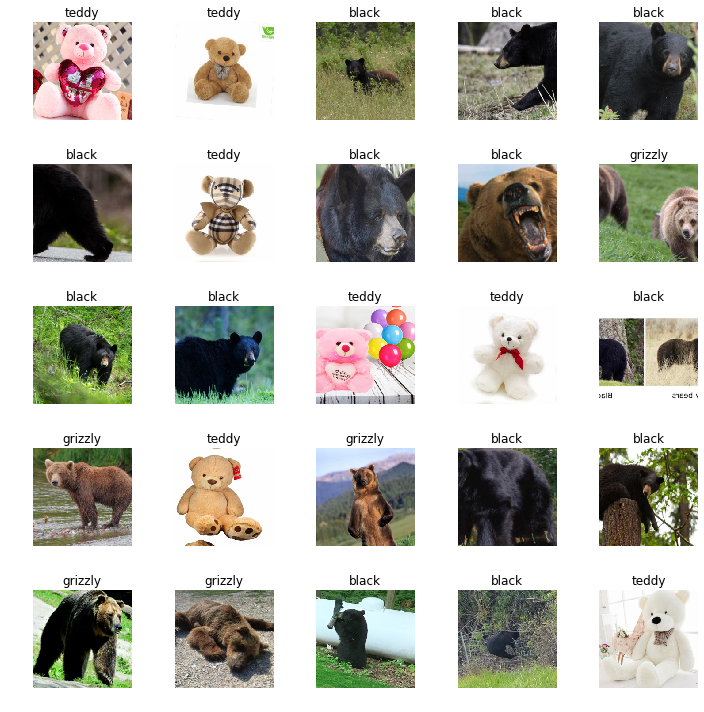

In [20]:
#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [21]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['black', 'grizzly', 'teddy']
539
134


In [0]:
#Training
learn = cnn_learner(data, models.resnet34, metrics = error_rate)


In [25]:
learn.fit_one_cycle(12)


epoch,train_loss,valid_loss,error_rate,time
0,1.070151,0.410348,0.126866,03:37
1,0.640799,0.072465,0.022388,03:33
2,0.452590,0.056567,0.022388,03:26
3,0.361490,0.089641,0.037313,03:24
4,0.300001,0.090404,0.029851,03:24
5,0.253071,0.085503,0.029851,03:24
6,0.214611,0.078744,0.037313,03:30
7,0.184126,0.079176,0.037313,03:32
8,0.162775,0.086977,0.037313,03:31
9,0.144428,0.094158,0.037313,03:27


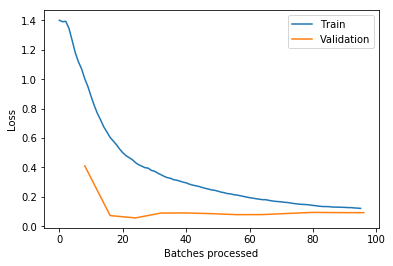

In [26]:
learn.recorder.plot_losses()


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


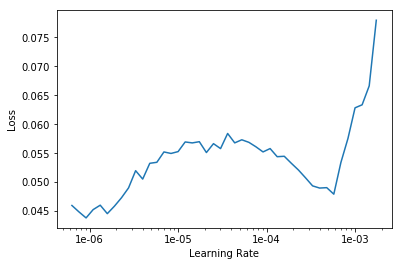

In [29]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.065739,0.088120,0.029851,04:56
1,0.057727,0.130271,0.052239,04:49
2,0.051682,0.136719,0.044776,04:50


In [0]:
learn.save('stage-2')


#Interpretation

In [0]:
learn.load('stage-1');


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


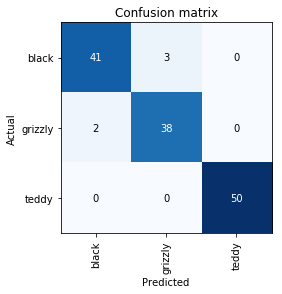

In [34]:
interp.plot_confusion_matrix()


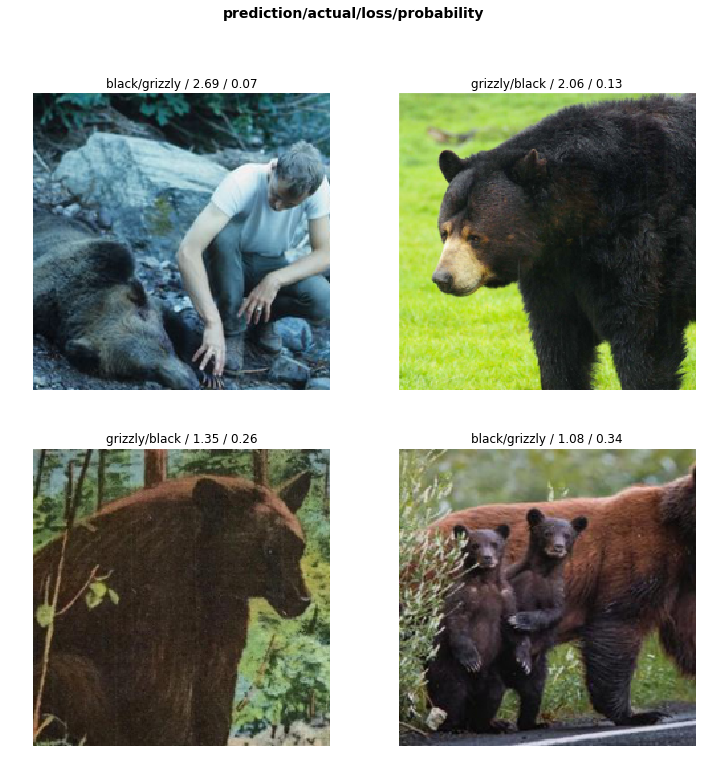

In [35]:
interp.plot_top_losses(k = 4, heatmap=False)


#Prediction

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn.export()


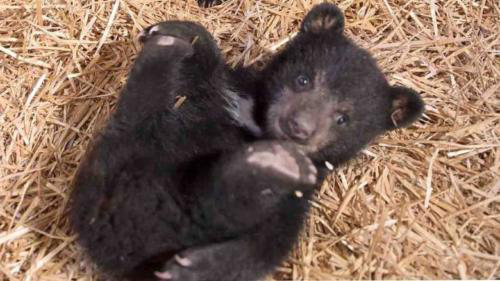

In [38]:
#example image
img = open_image(path/'black/00000066.jpeg')
img

In [0]:
learn = load_learner(path)


In [40]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)


Predicted class:  black


#Pickle Time
export your trained model as a pkl file

In [0]:
import pickle

In [0]:
with open('learn_pickle', 'wb') as f:
  pickle.dump(learn,f)